2 つの CSV ファイルを読み込み、各ルールにおける precision（適合率）と recall（再現率）を計算


In [17]:
!pip install statsmodels

  Using cached statsmodels-0.14.4-cp312-cp312-macosx_10_13_x86_64.whl.metadata (9.2 kB)
  Using cached scipy-1.15.0-cp312-cp312-macosx_14_0_x86_64.whl.metadata (61 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 513.3 kB/s eta 0:00:00a 0:00:01
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 421.8 kB/s eta 0:00:0000:0100:02

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

In [6]:
# CSVファイルの読み込み

# gemini_df = pd.read_csv('../../data/test/sampling_check_by_gemini.csv')
# human_df = pd.read_csv('../../data/test/sampling_check_by_human.csv')

gemini_df = pd.read_csv('../../data/test/sampling_check_by_gemini_updated.csv')
human_df = pd.read_csv('../../data/test/sampling_check_by_human_updated.csv')


# 出力先のパス

# output_path = '../../data/test/sampling_check_metrics.csv'
output_path = '../../data/test/sampling_check_metrics_updated.csv'

In [7]:
# TP, TN, FP, FNの計算と表示
# def calculate_metrics(gemini_df, human_df, output_path):
# 評価結果を格納する辞書
metrics = {}

# 対象となるルールを抽出（rule1 ~ rule31）
rules = [f'rule{i}' for i in range(1, 32)]

# 各ルールについて計算
for rule in rules:
    # True Positives (TP): Geminiと人間判定が両方 "yes"
    tp = ((gemini_df[rule] == 'yes') & (human_df[rule] == 'yes')).sum()
    
    # False Positives (FP): Geminiが "yes" だが、人間判定が "no"
    fp = ((gemini_df[rule] == 'yes') & (human_df[rule] == 'no')).sum()
    
    # False Negatives (FN): Geminiが "no" だが、人間判定が "yes"
    fn = ((gemini_df[rule] == 'no') & (human_df[rule] == 'yes')).sum()
    
    # True Negatives (TN): Geminiと人間判定が両方 "no"
    tn = ((gemini_df[rule] == 'no') & (human_df[rule] == 'no')).sum()
    
    # Precision（適合率）
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    # Recall（再現率）
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    # F1スコア
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Accuracy（正確度）
    accuracy = (tp + tn) / (tp + fp + fn + tn) if (tp + fp + fn + tn) > 0 else 0
    
    # 辞書に結果を保存
    metrics[rule] = {
        'TP': tp,
        'FP': fp,
        'FN': fn,
        'TN': tn,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
        'Accuracy': accuracy
    }

# 結果をDataFrameに変換して表示
metrics_df = pd.DataFrame(metrics).T
metrics_df.index.name = 'Rule'
metrics_df.reset_index(inplace=True)

# Accuracyの平均を計算
accuracy_mean = metrics_df['Accuracy'].mean()
print(f"\n全ルールのAccuracyの平均: {accuracy_mean:.4f}")

# 表示
print(metrics_df)

# 結果をCSVファイルとして保存
metrics_df.to_csv(output_path, index=False, encoding='utf-8')
print(f"\n結果がCSVファイルとして保存されました: {output_path}")

# 関数を実行して確認
# calculate_metrics(gemini_df, human_df, output_path)


全ルールのAccuracyの平均: 0.7434
      Rule    TP    FP    FN    TN  Precision    Recall  F1 Score  Accuracy
0    rule1  61.0  30.0   1.0   5.0   0.670330  0.983871  0.797386  0.680412
1    rule2  22.0  35.0   8.0  32.0   0.385965  0.733333  0.505747  0.556701
2    rule3   8.0   8.0  12.0  69.0   0.500000  0.400000  0.444444  0.793814
3    rule4  33.0  20.0   8.0  36.0   0.622642  0.804878  0.702128  0.711340
4    rule5  85.0   5.0   6.0   1.0   0.944444  0.934066  0.939227  0.886598
5    rule6  10.0   3.0  40.0  44.0   0.769231  0.200000  0.317460  0.556701
6    rule7  60.0  15.0  15.0   7.0   0.800000  0.800000  0.800000  0.690722
7    rule8  44.0   3.0  29.0  21.0   0.936170  0.602740  0.733333  0.670103
8    rule9  15.0  25.0   5.0  52.0   0.375000  0.750000  0.500000  0.690722
9   rule10  12.0   4.0  23.0  58.0   0.750000  0.342857  0.470588  0.721649
10  rule11  82.0  12.0   0.0   3.0   0.872340  1.000000  0.931818  0.876289
11  rule12  27.0  38.0   0.0  32.0   0.415385  1.000000  0.586

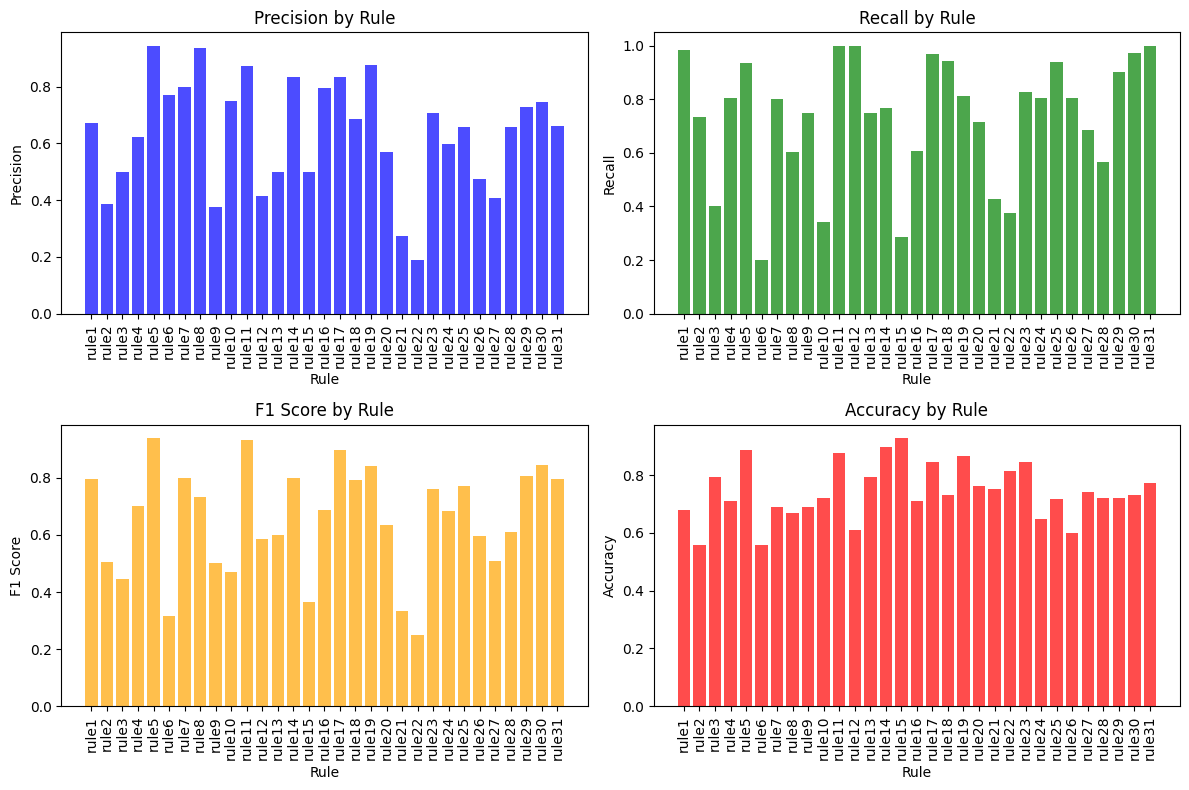

In [11]:
def plot_metrics(metrics_df):
    """
    Precision, Recall, F1 Score, Accuracy の棒グラフを表示する。
    Args:
        metrics_df (DataFrame): メトリクスを含むデータフレーム。
    """
    # メトリクスを抽出
    rules = metrics_df['Rule']  # ルール名
    precision = metrics_df['Precision']
    recall = metrics_df['Recall']
    f1_score = metrics_df['F1 Score']
    accuracy = metrics_df['Accuracy']
    
    # グラフサイズ設定
    plt.figure(figsize=(12, 8))
    
    # Precisionの棒グラフ
    plt.subplot(2, 2, 1)
    plt.bar(rules, precision, color='blue', alpha=0.7)
    plt.title('Precision by Rule')
    plt.xlabel('Rule')
    plt.ylabel('Precision')
    plt.xticks(rotation=90)
    
    # Recallの棒グラフ
    plt.subplot(2, 2, 2)
    plt.bar(rules, recall, color='green', alpha=0.7)
    plt.title('Recall by Rule')
    plt.xlabel('Rule')
    plt.ylabel('Recall')
    plt.xticks(rotation=90)
    
    # F1 Scoreの棒グラフ
    plt.subplot(2, 2, 3)
    plt.bar(rules, f1_score, color='orange', alpha=0.7)
    plt.title('F1 Score by Rule')
    plt.xlabel('Rule')
    plt.ylabel('F1 Score')
    plt.xticks(rotation=90)
    
    # Accuracyの棒グラフ
    plt.subplot(2, 2, 4)
    plt.bar(rules, accuracy, color='red', alpha=0.7)
    plt.title('Accuracy by Rule')
    plt.xlabel('Rule')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=90)
    
    # レイアウト調整
    plt.tight_layout()
    plt.show()

# 実行例
# metrics_df を calculate_metrics 関数で生成済みと仮定
plot_metrics(metrics_df)

In [13]:
f1_mean = metrics_df['F1 Score'].mean()
print(f"F1スコアの平均値: {f1_mean:.4f}")

F1スコアの平均値: 0.6554


In [21]:
# 対象となるルールを抽出（rule1 ~ rule31）
rules = [f'rule{i}' for i in range(1, 32)]

# 結果を格納するリスト
results = []

# 各ルールについてZ検定を実行
for rule in rules:
    # yesの数をカウント
    gemini_yes = (gemini_df[rule] == 'yes').sum()
    human_yes = (human_df[rule] == 'yes').sum()

    # サンプルサイズを取得
    gemini_total = len(gemini_df)
    human_total = len(human_df)

    # Z検定の実行
    count = [gemini_yes, human_yes]  # 成功回数
    nobs = [gemini_total, human_total]  # サンプルサイズ

    stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')

    # 結果をリストに追加
    results.append({'Rule': rule, 'P-value': p_value})

# 結果をデータフレームに変換
results_df = pd.DataFrame(results)

# 検定結果を出力
print(results_df)

      Rule       P-value
0    rule1  2.542150e-06
1    rule2  2.124618e-04
2    rule3  4.616028e-01
3    rule4  1.193321e-01
4    rule5  2.971465e-01
5    rule6  3.912743e-09
6    rule7  6.168548e-01
7    rule8  9.404514e-05
8    rule9  5.922830e-03
9   rule10  1.263563e-03
10  rule11  2.382603e-02
11  rule12  1.558951e-07
12  rule13  1.971716e-01
13  rule14  6.264736e-01
14  rule15  2.336604e-01
15  rule16  4.700388e-02
16  rule17  1.971716e-01
17  rule18  1.200092e-02
18  rule19  4.744864e-01
19  rule20  4.503382e-01
20  rule21  2.794854e-01
21  rule22  1.344810e-01
22  rule23  7.635972e-01
23  rule24  6.435646e-02
24  rule25  2.275785e-03
25  rule26  6.868086e-04
26  rule27  5.305443e-02
27  rule28  4.570300e-01
28  rule29  4.383286e-02
29  rule30  1.358104e-04
30  rule31  1.569670e-01


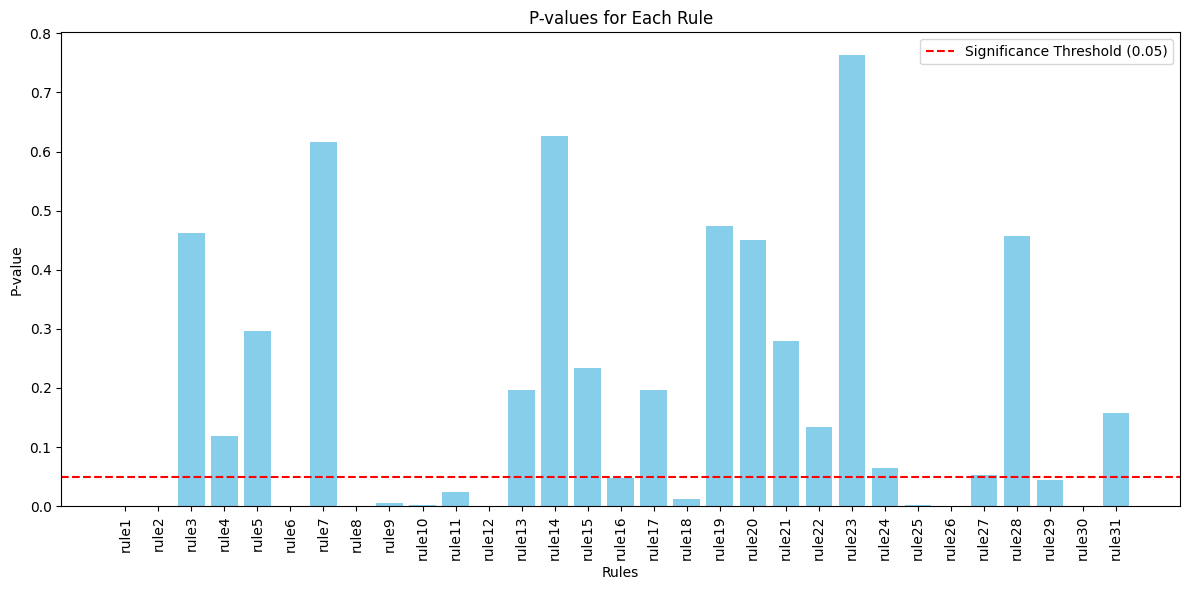

In [22]:
# グラフを作成
plt.figure(figsize=(12, 6))
plt.bar(results_df['Rule'], results_df['P-value'], color='skyblue')
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.xlabel('Rules')
plt.ylabel('P-value')
plt.title('P-values for Each Rule')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()